<a href="https://colab.research.google.com/github/sokrypton/ColabFold/blob/main/beta/ESMFold_api.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**ESMFold API**
for more details see: [Github](https://github.com/facebookresearch/esm/tree/main/esm), [Preprint](https://www.biorxiv.org/content/10.1101/2022.07.20.500902v1)

#### **Tips and Instructions**
- click the little ▶ play icon to the left of each cell below.

#### **Limitations**
- max total length=400
- for lengths > 400, try our [colab notebook](https://colab.research.google.com/github/sokrypton/ColabFold/blob/main/ESMFold.ipynb)
---

*credit: [@drchristhorpe](https://twitter.com/drchristhorpe)*

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

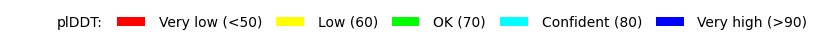

In [15]:
#@title run **ESMFold**
import os, time, re, requests
try:
  import colabfold as cf
except:
  %shell pip -q install py3Dmol
  %shell wget -qnc https://raw.githubusercontent.com/sokrypton/ColabFold/main/beta/colabfold.py

def predict(sequence):
  esmfold_api_url = 'https://api.esmatlas.com/foldSequence/v1/pdb/'
  r = requests.post(esmfold_api_url, data=sequence)
  while r.status_code != 200:
    time.sleep(5)
    r = requests.post(esmfold_api_url, data=sequence)
  structure = r.text
  return structure

sequence = "GWSTELEKHREELKEFLKKEGITNVEIRIDNGRLEVRVEGGTERLKRFLEELRQKLEKKGYTVDIKIE" #@param {type:"string"}
sequence = re.sub("[^A-Z]", "", sequence.upper())
#assert len(sequence) <= 400, "error: max length supported is 400"
pdb_str = predict(sequence)

with open("prediction.pdb","w") as out:
  out.write(pdb_str)

color = "confidence" #@param ["confidence", "rainbow"]
if color == "confidence": color = "lDDT"
show_sidechains = False #@param {type:"boolean"}
show_mainchains = False #@param {type:"boolean"}
v = cf.show_pdb("prediction.pdb",
                show_sidechains,
                show_mainchains, color,
                color_HP=True,
                size=(800,480),
                vmin=0.5, vmax=0.9)       
v.setHoverable({}, True,
               '''function(atom,viewer,event,container){if(!atom.label){atom.label=viewer.addLabel("      "+atom.resn+":"+atom.resi,{position:atom,backgroundColor:'mintcream',fontColor:'black'});}}''',
               '''function(atom,viewer){if(atom.label){viewer.removeLabel(atom.label);delete atom.label;}}''')
v.show()           
if color == "lDDT":
  cf.plot_plddt_legend().show()

In [11]:
#@title download prediction
from google.colab import files
files.download("prediction.pdb")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>